# Holt’s Linear Model


## Intro


The gist of exponential smoothing is to put more weight on recent observations and less weight, exponentially, on more historical ones.

The first model we introduced was simple exponential smoothing. The ‘simple’ part refers to the model not taking into account trend or seasonality, and only forecasting the level. This leads to this particular model to often deliver inadequate forecasts for most time series.

In comes Holt’s linear trend method (also known as double exponential smoothing), which like its name suggests, adds a (linear) trend component to the simple exponential smoothing model.

## Holt’s Linear Trend Model

Simple Exponential Smoothin model (last video) has no trend or seasonal component and leads to a flat forecast (all forecasts will be same and equal to the most recently observed value). Therefore, in 1957 Charles Holt extended this model to include a trend component, b_t:

**Overall Equation:**  
$$
\hat{y}_{t+h} = l_t + h b_t
$$  

**Level Equation:**  
$$
l_t = \alpha y_t + (1 - \alpha)(l_{t-1} + b_{t-1})
$$  

**Trend Equation:**  
$$
b_t = \beta (l_t - l_{t-1}) + (1 - \beta) b_{t-1}
$$

Where b_t is the forecasted trend component, b_{t-1} is the previous forecasted trend and β is the trend smoothing factor that can take on values 0 ≤ β ≤ 1.

The trend equation is computed from the step per step change in the level component. Additionally, from the overall equation, the trend component is now being multiplied by the time step, h, therefore the forecasts are no longer flat but are a linear function of h. Hence, the model’s name is Holt’s linear trend method.

For this model, we need to set an initial value for the trend component, a common choice is:

$$
b_0 = \frac{y_t - y_0}{t}
$$

Where t is some arbitrary time step in the time series. This is basically just an average forecast model.

One issue with this current formulation is that the forecasts will increase or decrease arbitrarily into the future. In reality, nothing grows nor decays indefinitely. Therefore, there is often a dampening term, ϕ, added to curtail the forecasts at long horizons:

**Overall Equation:**  
$$
\hat{y}_{t+h} = l_t + \left( \phi + \phi^2 + \cdots + \phi^h \right) b_t
$$  

**Level Equation:**  
$$
l_t = \alpha y_t + (1 - \alpha)(l_{t-1} + \phi b_{t-1})
$$  

**Trend Equation:**  
$$
b_t = \beta (l_t - l_{t-1}) + (1 - \beta)\phi b_{t-1}
$$

Where the value of ϕ can be 0 < ϕ < 1. The reason it cannot be 0 or 1 is to ensure some dampening indeed occurs. If ϕ=1 then the model would just be the vanilla Holt’s linear trend method.

## Implementing Exponential Smoothing in Python



/Users/amirashrafizham/Desktop/Machine Learning Projects/time-series/time-series-models/statisticalmodel/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


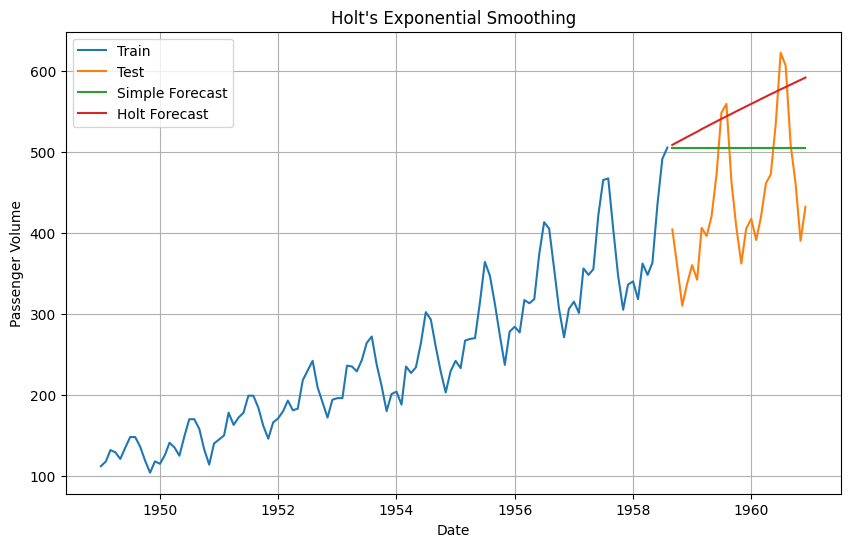

In [1]:
# Import packages
import plotly.graph_objects as go
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
import matplotlib.pyplot as plt
import kagglehub

# Read in the data
path = kagglehub.dataset_download("ashfakyeafi/air-passenger-data-for-time-series-analysis")
data = pd.read_csv(path + "/AirPassengers.csv")
#data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])

# Split train and test
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]


def plot_func(forecast1: list[float],
              forecast2: list[float],
              title: str) -> None:
    #"""Function to plot the forecasts."""
    #fig = go.Figure()
    #fig.add_trace(go.Scatter(x=train['Month'], y=train['#Passengers'], name='Train'))
    #fig.add_trace(go.Scatter(x=test['Month'], y=test['#Passengers'], name='Test'))
    #fig.add_trace(go.Scatter(x=test['Month'], y=forecast1, name='Simple'))
    #fig.add_trace(go.Scatter(x=test['Month'], y=forecast2, name='Holt'))
    #fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
    #                  width=650, title_x=0.5, height=400, xaxis_title='Date',
    #                  yaxis_title='Passenger Volume')

    #return fig.show()

    plt.figure(figsize=(10, 6))
    plt.plot(train['Month'], train['#Passengers'], label='Train')
    plt.plot(test['Month'], test['#Passengers'], label='Test')
    plt.plot(test['Month'], forecast1, label='Simple Forecast')
    plt.plot(test['Month'], forecast2, label='Holt Forecast')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Passenger Volume')
    plt.legend()
    plt.grid()
    plt.show()


# Fit simple model and get forecasts
model_simple = SimpleExpSmoothing(train['#Passengers']).fit(optimized=True)
forecasts_simple = model_simple.forecast(len(test))

# Fit Holt's model and get forecasts
model_holt = Holt(train['#Passengers'], damped_trend=True).fit(optimized=True)
forecasts_holt = model_holt.forecast(len(test))

# Plot the forecasts
plot_func(forecasts_simple, forecasts_holt, "Holt's Exponential Smoothing")

We observe that Holt’s method has captured the trend, whereas the simple exponential smoothing model is just a flat forecast like we expected. However, there is still an elephant in the room. Our time series has quite a high and obvious seasonality, which this Holt’s model doesn’t capture. I will go over in my next post on how to handle seasonality, however for now we can conclude that Holt’s method is only suitable for data with no seasonality.

In [2]:
model_holt.summary()

Dep. Variable:,#Passengers,No. Observations:,116
Model:,Holt,SSE,82207.301
Optimized:,True,AIC,771.355
Trend:,Additive,BIC,785.123
Seasonal:,None,AICC,772.393
Seasonal Periods:,None,Date:,"Sun, 15 Oct 2023"
Box-Cox:,False,Time:,18:51:26
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950556,alpha,True
smoothing_trend,9.8893e-05,beta,True


Here the smoothing_level refers to the smoothing level parameter, α, and is very large indicating the level changes very frequently. However, the smoothing_trend, which refers to the smoothing trend parameter, β, is very low meaning the trend barely changes that much. Finally, the damping_trend, which is ϕ, is large indicating that we need to forecast a long time in the future before we can observe the increasing trend decaying.
